In [ ]:
# Introduction

This Jupyter notebook contains the same `NonlinearSchrodinger.jl` examples in the paper and the documentation. Its purpose is to make it easier to get started.

In [1]:
using NonlinearSchrodinger
using Plots; gr()

Plots.GRBackend()

# Example 1: Cosine Wave Initial Condition

In [2]:
λ, T, Ω = params(λ = 0.8im)

xᵣ = 0=>100
box = Box(xᵣ, T, dx=1e-3, Nₜ = 256, n_periods = 1)

coeff = [1e-4] 
ψ₀, A₀ = ψ₀_periodic(coeff, box, Ω)

sim = Sim(λ, box, ψ₀, T4A_TJ!)

solve!(sim)
compute_IoM!(sim)

┌ Info: Passed λ=0.0 + 0.8im, computed T = 5.23598775598299 and Ω = 1.1999999999999997
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:67
┌ Info: Initializing Box with 1 period(s) and dx = 0.001, Nₜ = 256.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:18
┌ Info: Longitudinal range is [0, 100], transverse range is [-2.617993877991495, 2.617993877991495)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:20
┌ Info: Done computing t, x, ω
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:40
┌ Info: Initializing periodic ψ₀
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:119
┌ Info: Computing A₀ to preserve normalization.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:126
┌ Info: Computed A₀ = 0.99999999
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchro

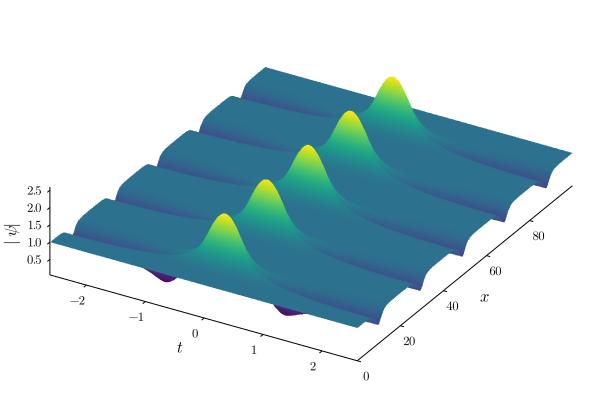

In [3]:
surface(sim)

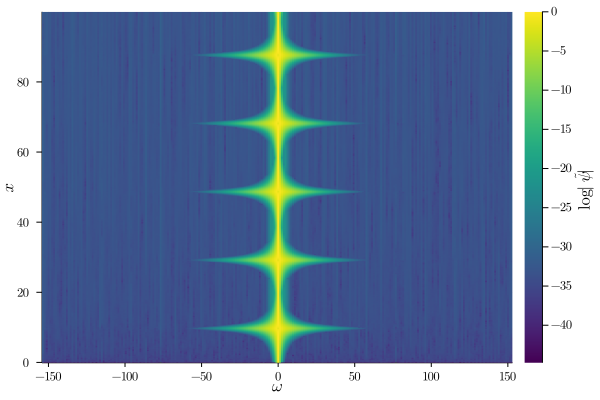

In [4]:
heatmap(sim, :ψ̃)

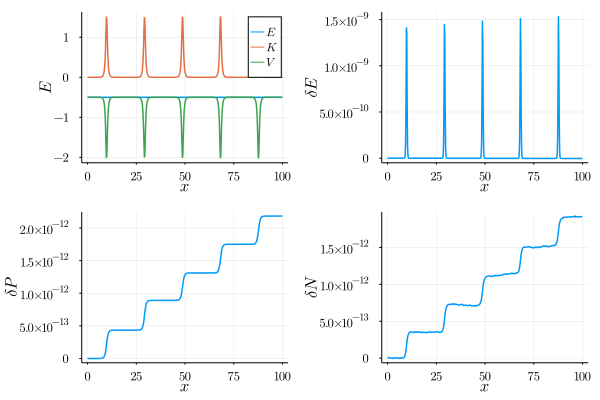

In [5]:
plot(sim, :IoM)

# Example 2: Soliton Initial Condition

In [6]:
λ = 0.75im

T = 20
xᵣ = 0=>100
box = Box(xᵣ, T, dx=1e-3, Nₜ = 256, n_periods = 1)

ψ₀ = Array{Complex{Float64}}(undef, box.Nₜ)
ψ₀ .= 2*imag(λ)./cosh.(2*imag(λ).*box.t)

sim = Sim(λ, box, ψ₀, T4A_TJ!)

solve!(sim)
compute_IoM!(sim)

┌ Info: Initializing Box with 1 period(s) and dx = 0.001, Nₜ = 256.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:18
┌ Info: Longitudinal range is [0, 100], transverse range is [-10.0, 10.0)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:20
┌ Info: Done computing t, x, ω
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:40
┌ Info: Passed λ=0.0 + 0.75im, computed T = 4.749641646894903 and Ω = 1.3228756555322954
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:67
┌ Info: Generating FFT plans
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:221
┌ Info: Starting evolution
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Simulation.jl:25
┌ Info: Computing Spectrum
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Simulation.jl:57
┌ Info: Computation Done!
└ @ N

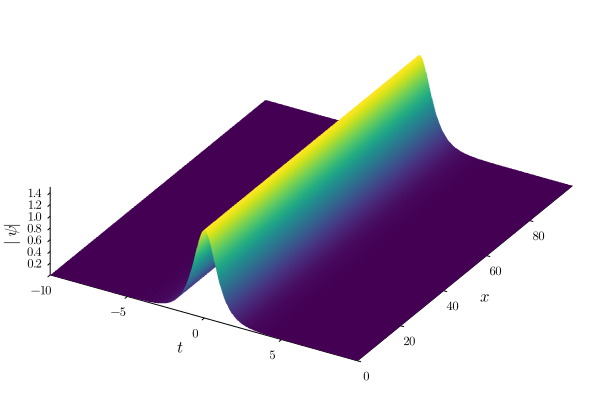

In [7]:
surface(sim)

# Example 3: NLTC

In [12]:
λ, T, Ω = params(a = 0.36)

xᵣ = 0=>60
box = Box(xᵣ, T, dx=1e-3, Nₜ = 512, n_periods = 5)

coeff = [(2.7 + 4.6im)*1e-2]
ψ₀, A₀ = ψ₀_periodic(coeff, box, Ω)

sim = Sim(λ, box, ψ₀, T4A_TJ!, β = 10.0)

solve!(sim)

┌ Info: Passed a = 0.36, computed λ = 0.0 + 0.848528137423857im, T = 5.937052058618629 and Ω = 1.0583005244258363
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:62
┌ Info: Initializing Box with 5 period(s) and dx = 0.001, Nₜ = 512.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:18
┌ Info: Longitudinal range is [0, 60], transverse range is [-14.842630146546572, 14.842630146546572)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:20
┌ Info: Done computing t, x, ω
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:40
┌ Info: Initializing periodic ψ₀
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:119
┌ Info: Computing A₀ to preserve normalization.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:126
┌ Info: Computed A₀ = 0.9971509414326399
└ @ NonlinearSchrodinger /Us

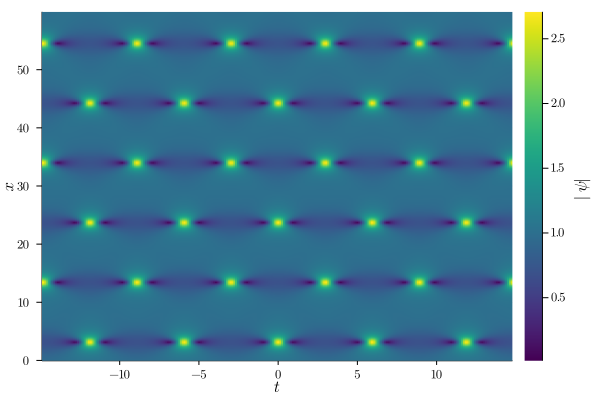

In [13]:
heatmap(sim)

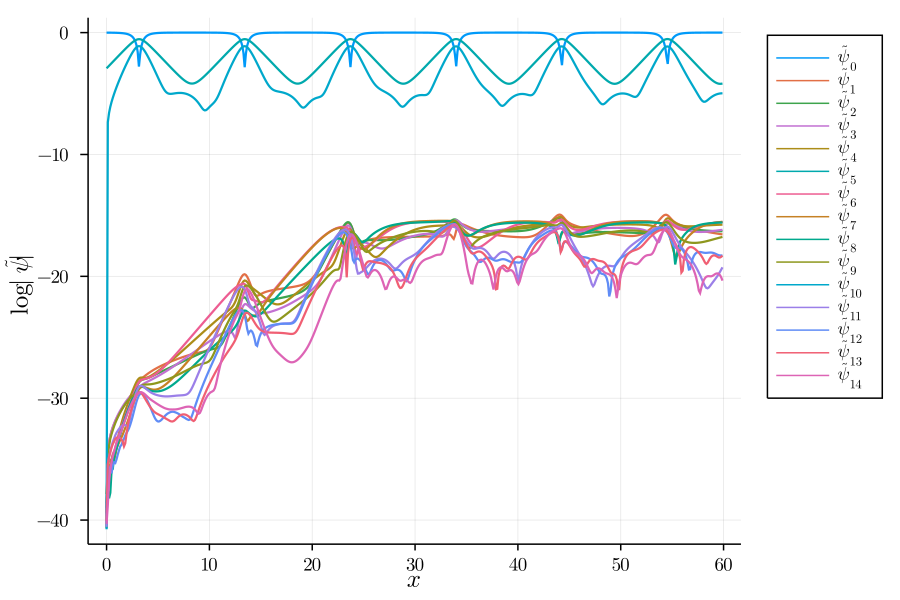

In [17]:
plot(sim, :ψ̃, n_lines=15, dpi=150)

# Example 4: Soliton

In [18]:
xᵣ = -10=>10
T = 20
seed = "0"
box = Box(xᵣ, T, Nₓ=1000, Nₜ = 1000)
λ = [-0.45 + 0.775im, -0.35 + 0.8im, -0.25 + 0.825im, 0.85im, 0.25 + 0.875im, 0.35 + 0.9im, 0.45 + 0.925im]
xₛ = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
tₛ = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

calc = Calc(λ, tₛ, xₛ, seed, box) 

solve!(calc)

┌ Info: Initializing Box with 1 period(s) and dx = 0.0, Nₜ = 1000.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:18
┌ Info: Longitudinal range is [-10, 10], transverse range is [-10.0, 10.0)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:20
┌ Info: Done computing t, x, ω
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:40
┌ Info: Calculating Lax pair generating functions rₙₚ(x,t) and sₙₚ(x,t) for (n,p) = (7,1)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Darboux.jl:35
┌ Info: Calculating Lax pair generating functions rₙₚ(x,t) and sₙₚ(x,t) for (n,p) = (6,1)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Darboux.jl:35
┌ Info: Calculating Lax pair generating functions rₙₚ(x,t) and sₙₚ(x,t) for (n,p) = (5,1)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Darboux.jl:35
┌ Info: Calculating Lax pair 

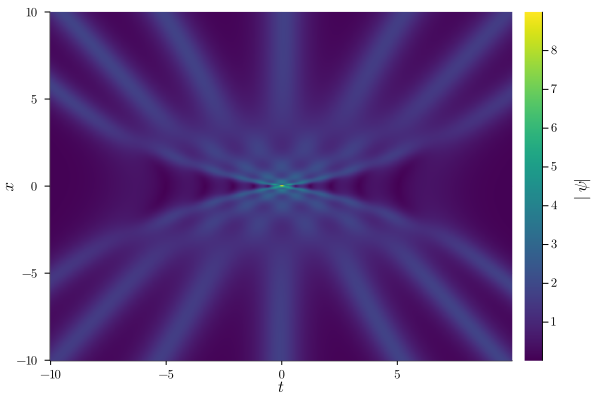

In [20]:
heatmap(calc)

# Example 5: Breather

In [21]:
xᵣ = -10=>10
λ₁ = 0.98im
λ, T, Ω = params(λ = λ₁)
box = Box(xᵣ, T, Nₓ=1000, Nₜ = 1000, n_periods = 3)

λ = λ_maximal(λ₁, 5) # array of 5 eigenvalues
xₛ = [0.0, 0.0, 0.0, 0.0, 0.0]
tₛ = [0.0, 0.0, 0.0, 0.0, 0.0]

seed = "exp"
calc = Calc(λ, tₛ, xₛ, seed, box) 

solve!(calc)

┌ Info: Passed λ=0.0 + 0.98im, computed T = 15.787097084991364 and Ω = 0.3979949748426484
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:67
┌ Info: Initializing Box with 3 period(s) and dx = 0.0, Nₜ = 1000.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:18
┌ Info: Longitudinal range is [-10, 10], transverse range is [-23.680645627487046, 23.680645627487046)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:20
┌ Info: Done computing t, x, ω
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:40
┌ Info: Calculating Lax pair generating functions rₙₚ(x,t) and sₙₚ(x,t) for (n,p) = (5,1)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Darboux.jl:35
┌ Info: Calculating Lax pair generating functions rₙₚ(x,t) and sₙₚ(x,t) for (n,p) = (4,1)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Darboux.jl:35

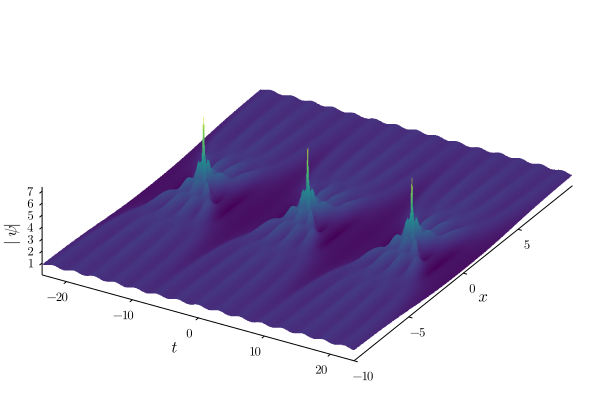

In [22]:
surface(calc)

# Example 6: Soliton on CN Background

In [23]:
xᵣ = -10=>10
T = 20

box = Box(xᵣ, T, Nₓ=1000, Nₜ = 1000, n_periods = 1)
λ = [-0.3+0.85im, 0.9im, 0.3+0.95im]
xₛ = [0.0, 0.0, 0.0]
tₛ = [0.0, 0.0, 0.0]

seed = "cn"
calc = Calc(λ, tₛ, xₛ, seed, box, m = 0.5) 

solve!(calc)

┌ Info: Initializing Box with 1 period(s) and dx = 0.0, Nₜ = 1000.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:18
┌ Info: Longitudinal range is [-10, 10], transverse range is [-10.0, 10.0)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:20
┌ Info: Done computing t, x, ω
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:40
┌ Info: Calculating Lax pair generating functions rₙₚ(x,t) and sₙₚ(x,t) for (n,p) = (3,1)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Darboux.jl:35
┌ Info: Calculating Lax pair generating functions rₙₚ(x,t) and sₙₚ(x,t) for (n,p) = (2,1)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Darboux.jl:35
┌ Info: Calculating Lax pair generating functions rₙₚ(x,t) and sₙₚ(x,t) for (n,p) = (1,1)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Darboux.jl:35
┌ Info: Calculating Lax pair 

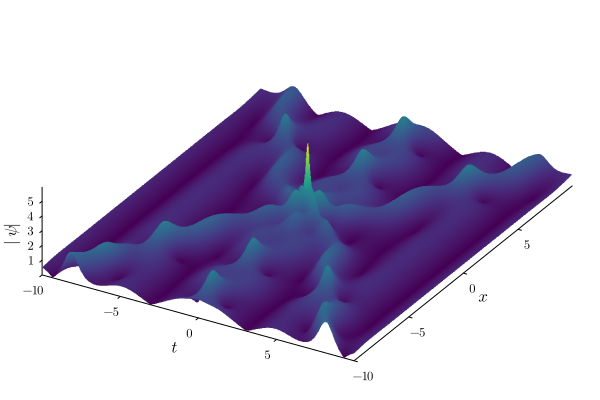

In [24]:
surface(calc)

# Example 7: Breathers on DN Background

In [25]:
xᵣ = -10=>10
m = 2/5
λ = λ_given_m(m, q=4)
λ, T, Ω = params(λ = λ, m=m)
box = Box(xᵣ, T, Nₓ=1000, Nₜ = 1000, n_periods = 3)

λ = λ_maximal(λ, 1, m=m)
xₛ = [0.0]
tₛ = [0.0]

seed = "dn"
calc = Calc(λ, tₛ, xₛ, seed, box, m=m) 

solve!(calc)

┌ Info: Passed λ=0.0 + 0.8588568879615993im, computed T = 14.220154971930045 and Ω = 0.4418506914715286
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:86
┌ Info: Initializing Box with 3 period(s) and dx = 0.0, Nₜ = 1000.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:18
┌ Info: Longitudinal range is [-10, 10], transverse range is [-21.330232457895068, 21.330232457895068)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:20
┌ Info: Done computing t, x, ω
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:40
┌ Info: Calculating Lax pair generating functions rₙₚ(x,t) and sₙₚ(x,t) for (n,p) = (1,1)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Darboux.jl:35


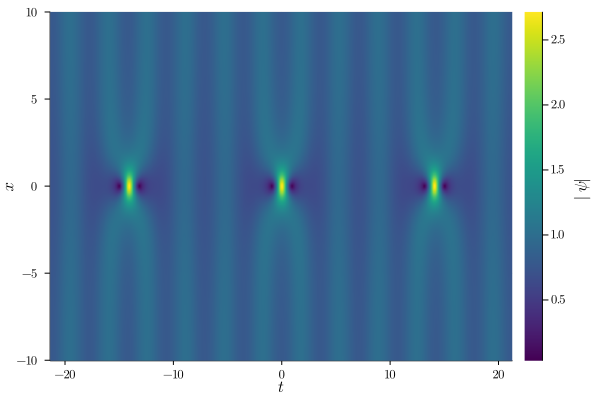

In [26]:
heatmap(calc)

# Example 8: DT Initial Condition

In [27]:
λ₁ = 0.98im
λ, T, Ω = params(λ = λ₁)

xᵣ = 0=>100
box = Box(xᵣ, T, dx=1e-3, Nₜ = 512)

λ = λ_maximal(λ₁, 5) # array of 5 eigenvalues
xₛ = [0.0, 0.0, 0.0, 0.0, 0.0]
tₛ = [0.0, 0.0, 0.0, 0.0, 0.0]
ψ₀ = ψ₀_DT(λ, tₛ, xₛ, -10, box)

sim = Sim(λ₁, box, ψ₀, T4A_TJ!)

solve!(sim)
compute_IoM!(sim)

┌ Info: Passed λ=0.0 + 0.98im, computed T = 15.787097084991364 and Ω = 0.3979949748426484
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:67
┌ Info: Initializing Box with 1 period(s) and dx = 0.001, Nₜ = 512.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:18
┌ Info: Longitudinal range is [0, 100], transverse range is [-7.893548542495682, 7.893548542495682)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:20
┌ Info: Done computing t, x, ω
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:40
┌ Info: Initializing Box with 1 period(s) and dx = 0.0, Nₜ = 512.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:18
┌ Info: Longitudinal range is [-10, -9.99999], transverse range is [-7.893548542495682, 7.893548542495682)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:20
┌ Info: Done

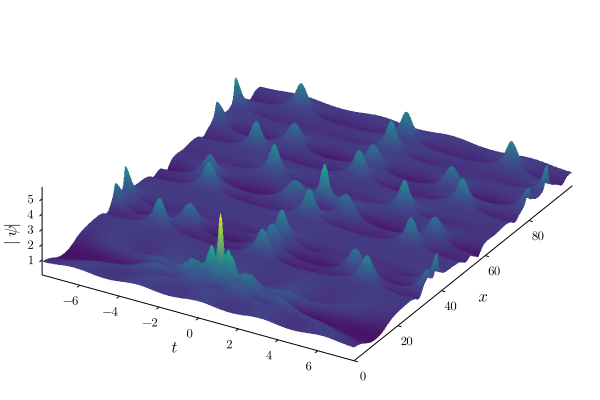

In [29]:
surface(sim)

# Example 9: Breather to Soliton Conversion

In [30]:
xᵣ = -5=>5
T = 60
box = Box(xᵣ, T, Nₓ=1000, Nₜ = 1000, n_periods = 1)

f = Dict{Symbol,Float64}(:α=> 0.75, :γ => -0.12, :δ=>-0.13)
λ = [λ_given_f(f, 0.9)]
xₛ = [0.0]
tₛ = [0.0]

seed = "exp"

calc = Calc(λ, tₛ, xₛ, seed, box, f = f) 

solve!(calc)


┌ Info: Initializing Box with 1 period(s) and dx = 0.0, Nₜ = 1000.
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:18
┌ Info: Longitudinal range is [-5, 5], transverse range is [-30.0, 30.0)
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:20
┌ Info: Done computing t, x, ω
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Types.jl:40
┌ Info: Computing real part of eigenvalue for breather to soliton conversion
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:216
┌ Info: Got α = 0.75, γ = -0.12, δ = -0.13
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:217
┌ Info: Computed v = 0.745134769585123
└ @ NonlinearSchrodinger /Users/ashour/.julia/dev/NonlinearSchrodinger/src/Utilities.jl:222
┌ Info: Calculating Lax pair generating functions rₙₚ(x,t) and sₙₚ(x,t) for (n,p) = (1,1)
└ @ NonlinearSchrodinger /Users/ashour/.jul

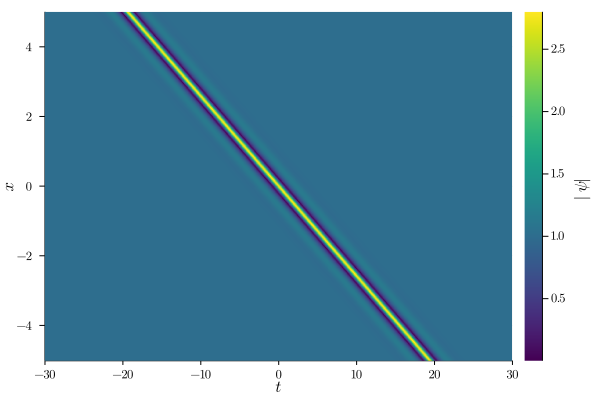

In [32]:
heatmap(calc, xlims=(-30, 30))